### Libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from plotly.subplots import make_subplots
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..','data','03_primary','3.spotify.csv')

# Load the CSV file
spotify = pd.read_csv(ruta_csv_relativa)

In [17]:
spotify

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,duration_ms_scaled,popularity_scaled,track_genre_encoded,intensity,popularity_class
0,73.0,0.669059,0.460989,1,0.779395,0.128221,0.032329,0.000001,0.352006,0.718593,0.301970,acoustic,0.461947,0.920689,0,0.308429,1
1,55.0,0.394881,0.165983,1,0.574223,0.057482,0.927711,0.000006,0.092607,0.268342,0.243282,acoustic,0.387347,0.849624,0,0.065544,1
2,57.0,0.414159,0.358987,0,0.720948,0.035635,0.210843,0.000000,0.108756,0.120603,0.236770,acoustic,0.446450,0.858572,0,0.148678,1
3,71.0,0.229945,0.059581,0,0.549185,0.015060,0.908635,0.000071,0.123896,0.143719,0.830006,acoustic,0.439024,0.913703,0,0.013700,1
4,82.0,0.606940,0.442989,2,0.721984,0.032347,0.470884,0.000000,0.074338,0.167839,0.482246,acoustic,0.436375,0.949954,0,0.268868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,21.0,0.129271,0.234985,5,0.590693,0.021317,0.642570,0.928000,0.077769,0.034070,0.516273,world-music,0.550216,0.611400,113,0.030377,0
113795,22.0,0.131413,0.116982,0,0.553039,0.019090,0.997992,0.976000,0.096644,0.035176,0.286899,world-music,0.550216,0.622734,113,0.015373,0
113796,22.0,0.618721,0.328986,0,0.698238,0.021105,0.870482,0.000000,0.075347,0.746734,0.552197,world-music,0.490010,0.622734,113,0.203551,0
113797,41.0,0.573739,0.505990,7,0.698355,0.008060,0.382530,0.000000,0.263184,0.415075,0.572356,world-music,0.497723,0.776273,113,0.290306,1


# Linear Regresion

NameError: name 'plot_confusion_matrix' is not defined

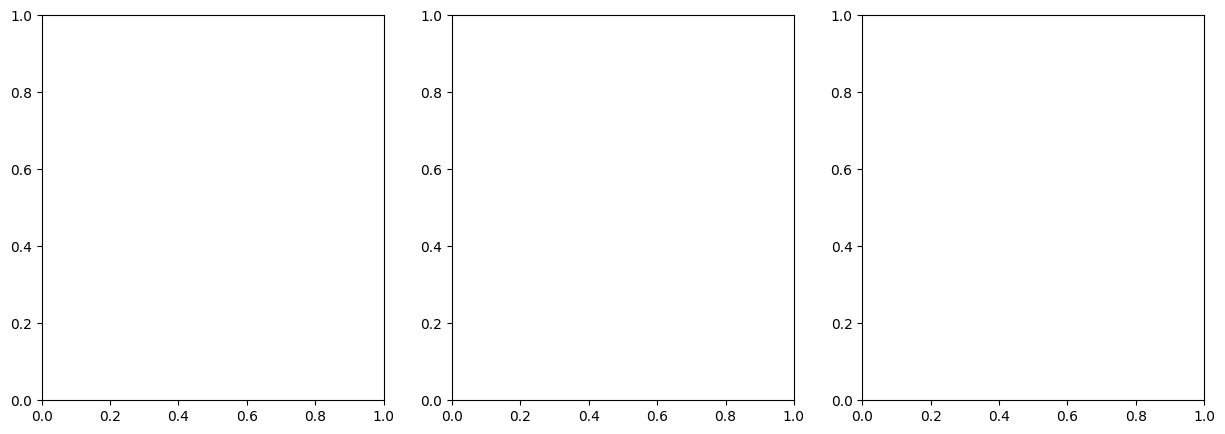

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir las combinaciones recomendadas de predictores
predictors_essential = ['danceability', 'energy', 'loudness', 'speechiness', 'intensity']
predictors_simplified = ['loudness', 'intensity', 'speechiness']
predictors_moderate = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'intensity']
predictors_complete = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'intensity']

# Función para probar modelos y agregar métricas adicionales
def probar_modelo_con_metricas(predictors, nombre_conjunto):
    X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify['popularity_scaled'], test_size=0.2, random_state=42)

    # Regresión Lineal
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    lin_pred = lin_model.predict(X_test)
    lin_mse = mean_squared_error(y_test, lin_pred)
    lin_rmse = np.sqrt(lin_mse)
    lin_mae = mean_absolute_error(y_test, lin_pred)
    lin_r2 = r2_score(y_test, lin_pred)
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_rmse = np.sqrt(rf_mse)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    
    # Árbol de Decisión (Decision Tree)
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_train, y_train)
    tree_pred = tree_model.predict(X_test)
    tree_mse = mean_squared_error(y_test, tree_pred)
    tree_rmse = np.sqrt(tree_mse)
    tree_mae = mean_absolute_error(y_test, tree_pred)
    tree_r2 = r2_score(y_test, tree_pred)
    
    # Resultados
    resultados = {
        'Conjunto de Predictores': nombre_conjunto,
        'Linear Regression MSE': lin_mse,
        'Linear Regression RMSE': lin_rmse,
        'Linear Regression MAE': lin_mae,
        'Linear Regression R²': lin_r2,
        'Random Forest MSE': rf_mse,
        'Random Forest RMSE': rf_rmse,
        'Random Forest MAE': rf_mae,
        'Random Forest R²': rf_r2,
        'Decision Tree MSE': tree_mse,
        'Decision Tree RMSE': tree_rmse,
        'Decision Tree MAE': tree_mae,
        'Decision Tree R²': tree_r2
    }
    
    return resultados

# Probar con los cuatro conjuntos de predictores
resultados_essential = probar_modelo_con_metricas(predictors_essential, 'Essential Predictors')
resultados_simplified = probar_modelo_con_metricas(predictors_simplified, 'Simplified Predictors')
resultados_moderate = probar_modelo_con_metricas(predictors_moderate, 'Moderate Predictors')
resultados_complete = probar_modelo_con_metricas(predictors_complete, 'Complete Predictors')

# Mostrar los resultados de las pruebas con diferentes conjuntos de predictores
resultados_finales = pd.DataFrame([resultados_essential, resultados_simplified, resultados_moderate, resultados_complete])
print(resultados_finales)

In [23]:
resultados_finales

,Conjunto de Predictores,Linear Regression MSE,Linear Regression RMSE,Linear Regression MAE,Linear Regression R²,Random Forest MSE,Random Forest RMSE,Random Forest MAE,Random Forest R²,Decision Tree MSE,Decision Tree RMSE,Decision Tree MAE,Decision Tree R²
0,Essential Predictors,0.029349,0.171316,0.115433,0.013413,0.020499,0.143174,0.094298,0.310920,0.033625,0.183372,0.112960,-0.130335
1,Simplified Predictors,0.029501,0.171760,0.116167,0.008292,0.021169,0.145496,0.096684,0.288393,0.033575,0.183235,0.114425,-0.128646
2,Moderate Predictors,0.029313,0.171211,0.115318,0.014617,0.019911,0.141106,0.092377,0.330685,0.033252,0.182351,0.111908,-0.117782
3,Complete Predictors,0.028807,0.169725,0.113692,0.031655,0.018666,0.136622,0.088440,0.372544,0.031978,0.178825,0.107840,-0.074965


### Random Forest es el mejor modelo

# Logistic Regresion

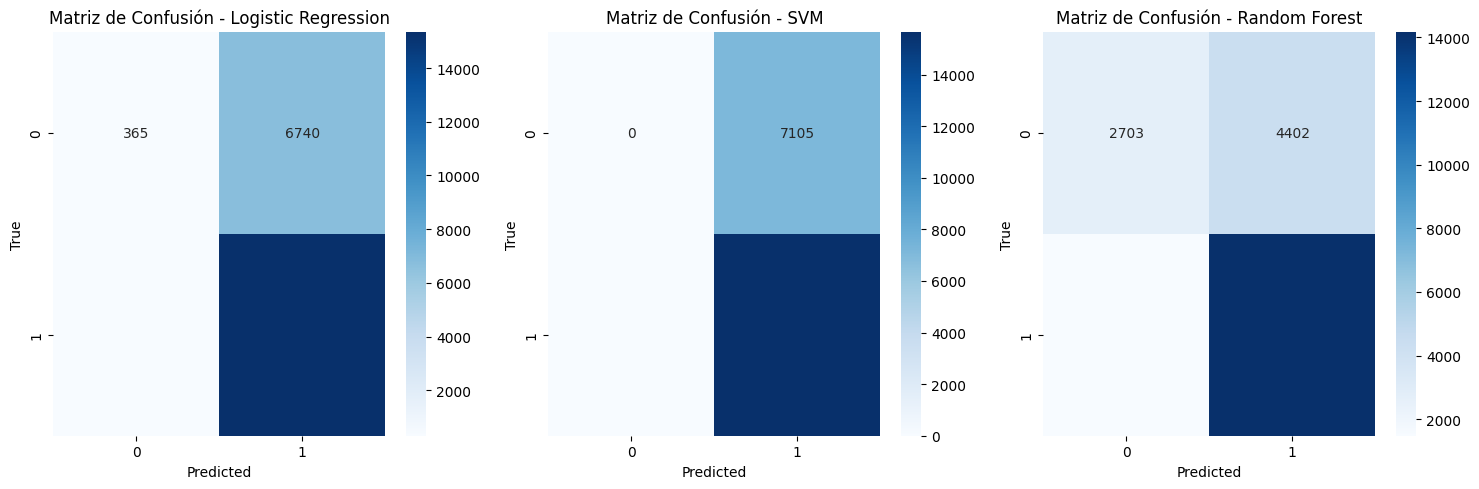

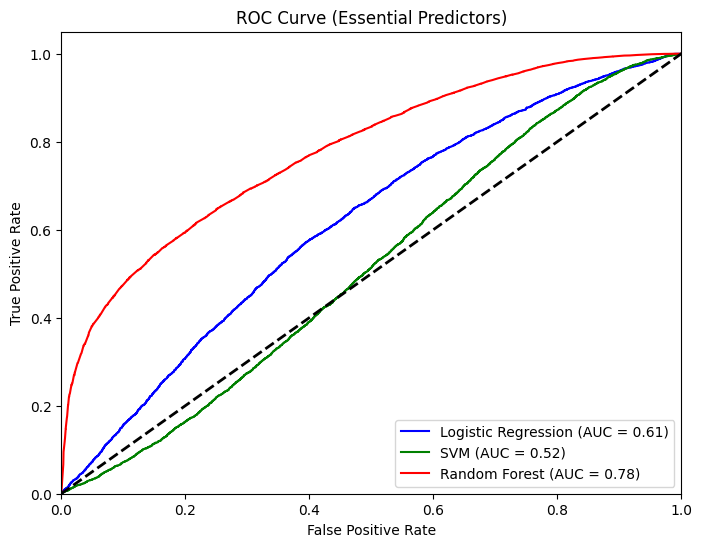

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Definir las combinaciones recomendadas de predictores
predictors_essential = ['danceability', 'energy', 'loudness', 'speechiness', 'intensity']
predictors_simplified = ['loudness', 'intensity', 'speechiness']
predictors_moderate = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'intensity']
predictors_complete = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'intensity']

# Función para entrenar y evaluar tres modelos, generar matriz de confusión y curva ROC
def probar_modelo_con_matrices(predictors, nombre_conjunto):
    X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify['popularity_class'], test_size=0.2, random_state=42)
    
    # Regresión Logística
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    log_reg_pred = log_reg.predict(X_test)
    log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
    
    # SVM
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)
    svm_proba = svm_model.predict_proba(X_test)[:, 1]
    
    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Matrices de confusión para cada modelo
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Función para graficar la matriz de confusión
    def plot_conf_matrix(model_name, y_test, y_pred, ax):
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f"Matriz de Confusión - {model_name}")
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
    
    # Matriz de confusión - Regresión Logística
    plot_conf_matrix("Logistic Regression", y_test, log_reg_pred, axes[0])
    
    # Matriz de confusión - SVM
    plot_conf_matrix("SVM", y_test, svm_pred, axes[1])
    
    # Matriz de confusión - Random Forest
    plot_conf_matrix("Random Forest", y_test, rf_pred, axes[2])
    
    plt.tight_layout()
    plt.show()

    # ROC Curves
    fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_proba)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
    
    roc_auc_log = auc(fpr_log, tpr_log)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    # Graficar las curvas ROC para los tres modelos
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
    plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='green')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='red')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve ({nombre_conjunto})")
    plt.legend(loc="lower right")
    plt.show()

# Probar con los cuatro conjuntos de predictores
resultados_essential = probar_modelo_con_matrices(predictors_essential, 'Essential Predictors')
resultados_simplified = probar_modelo_con_matrices(predictors_simplified, 'Simplified Predictors')
resultados_moderate = probar_modelo_con_matrices(predictors_moderate, 'Moderate Predictors')
resultados_complete = probar_modelo_con_matrices(predictors_complete, 'Complete Predictors')

# Mostrar los resultados de las pruebas con diferentes conjuntos de predictores
resultados_finalesLogistic = pd.DataFrame([resultados_essential, resultados_simplified, resultados_moderate, resultados_complete])
print(resultados_finalesLogistic)

In [20]:
resultados_finalesLogistic

,Conjunto de Predictores,Logistic Regression Accuracy,Logistic Regression Precision,Logistic Regression Recall,Logistic Regression F1-Score,SVM Accuracy,SVM Precision,SVM Recall,SVM F1-Score,Random Forest Accuracy,Random Forest Precision,Random Forest Recall,Random Forest F1-Score
0,Essential Predictors,0.690334,0.694843,0.980326,0.813258,0.68783,0.68783,1.0,0.815046,0.741652,0.763066,0.905589,0.828241
1,Simplified Predictors,0.692223,0.693634,0.989652,0.815614,0.68783,0.68783,1.0,0.815046,0.724033,0.749707,0.898882,0.817545
2,Moderate Predictors,0.689982,0.694627,0.980198,0.813066,0.68783,0.68783,1.0,0.815046,0.749692,0.767688,0.912105,0.833689
3,Complete Predictors,0.705097,0.712675,0.957138,0.817012,0.68783,0.68783,1.0,0.815046,0.767619,0.783069,0.915874,0.844281


### Random Forest es el mejor modelo